In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

filtered_df = pd.read_csv("datasets/FINAL_DF.csv")

In [4]:
pd.set_option('display.max_columns', None)

# Assuming 'filtered_df' is your DataFrame
display (filtered_df)

,Unnamed: 0,auhtor_ID,post,political_leaning,anger,joy,sadness,fear,surprise,disgust,neutral,aggression,sentiment,flesch_reading_ease,gunning_fog_index,smog_index,coleman_liau_index,dominant_topic,topic_probabilities,positive,neutral_aggression2,negative
0,0,t2_7ramzeng,"You can ""buy"" the show and stream it through t...",2,0.014805,0.005912,0.110924,0.034758,0.586107,0.070533,0.176962,0.054291,1,0.976157,0.006718,0.217391,0.139716,4,"[0.0003453914497208392, 0.00034883894774757917...",0.475160,0.0,0.524840
1,1,t2_7ramzeng,"me want to play Q*bert Holy shit, based Alex J...",2,0.027315,0.001891,0.010748,0.301687,0.064253,0.007861,0.586245,0.002662,0,0.979025,0.009097,0.228833,0.143615,4,"[0.0003418033923316742, 0.00034392267596575774...",0.349724,0.0,0.650276
2,2,t2_7ramzeng,Shouldn't rely on any external services or per...,2,0.117353,0.001744,0.216931,0.068695,0.355632,0.037736,0.201910,0.063582,1,0.975427,0.008108,0.228833,0.144394,4,"[0.0003559552059939257, 0.000356640173919713, ...",0.402961,0.0,0.597039
3,3,t2_7ramzeng,PR to a specific person. Usually that just mea...,2,0.929201,0.009746,0.007165,0.006163,0.039090,0.005436,0.003198,0.061321,1,0.973510,0.009633,0.233410,0.151723,4,"[0.00036737078216054944, 0.0003753084702771817...",0.451993,0.0,0.548007
4,4,t2_7ramzeng,This article's intention is clear that they wa...,2,0.595107,0.003661,0.028298,0.051250,0.061424,0.177208,0.083052,0.031205,0,0.973706,0.009800,0.247140,0.160767,4,"[0.0003477116906456499, 0.0003543476132099578,...",0.405299,0.0,0.594701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57179,57179,t2_4ngvl16j,a good one? That's odd. I remember it as being...,0,0.007957,0.000605,0.293186,0.552914,0.090529,0.027591,0.027217,0.010430,2,0.978601,0.004573,0.199085,0.126930,4,"[0.0003561949730232225, 0.0003579082137145172,...",0.401391,0.0,0.598609
57180,57180,t2_4ngvl16j,"boring shit in the fucking world. ""History doe...",0,0.949435,0.011954,0.010706,0.004163,0.011478,0.007713,0.004551,0.001648,0,0.978868,0.004372,0.196796,0.130516,4,"[0.0003815006365769941, 0.00038508522087901583...",0.473102,0.0,0.526898
57181,57181,t2_4ngvl16j,you see no contradiction there? Why or why not...,0,0.245820,0.002374,0.039280,0.023479,0.061454,0.565985,0.061608,0.001370,1,0.977213,0.006919,0.228833,0.147825,4,"[0.0033581035118068914, 0.0003944790915705773,...",0.421882,0.0,0.578118
57182,57182,t2_4ngvl16j,is only created by an incommensurate worldview...,0,0.755447,0.009755,0.009225,0.008800,0.166770,0.036076,0.013927,0.002674,0,0.977480,0.006014,0.215103,0.141431,2,"[0.00038531129221763805, 0.0003828071711599036...",0.407050,0.0,0.592950


In [ ]:
distribution = filtered_df.groupby(['political_leaning', 'dominant_topic']).size().reset_index(name='count')

# Calculate total count per political leaning
total_counts = distribution.groupby('political_leaning')['count'].sum()

# Calculate percentage distribution
distribution['percentage'] = distribution.apply(
    lambda row: (row['count'] / total_counts[row['political_leaning']]) * 100, axis=1
)

# Class mapping for political leaning
class_mapping = {0: 'Center', 1: 'Left', 2: 'Right'}

# Print the distribution with class mapping
for political_leaning, group in distribution.groupby('political_leaning'):
    print(f"Political Leaning: {class_mapping[political_leaning]}")
    for _, row in group.iterrows():
        print(f"  LDA Dominant Topic: {row['dominant_topic']}, Count: {row['count']}, Percentage: {row['percentage']:.2f}%")
    print()

C:\Users\20211424\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.84      0.61      5050
           1       0.46      0.14      0.22      2857
           2       0.49      0.22      0.30      3530

    accuracy                           0.48     11437
   macro avg       0.48      0.40      0.38     11437
weighted avg       0.48      0.48      0.42     11437


Confusion Matrix:


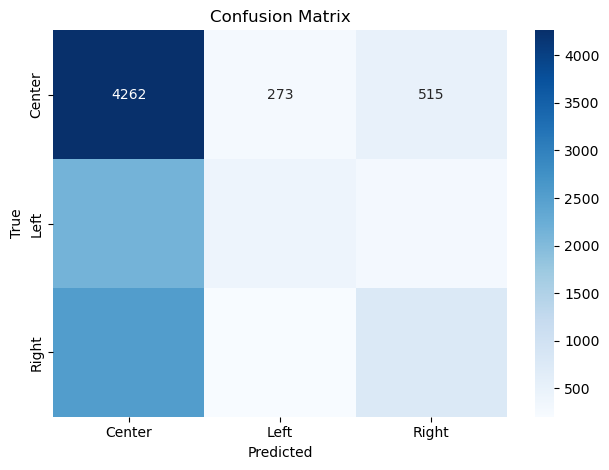


Accuracy: 0.48

Precision (macro avg): 0.48

Recall (macro avg): 0.40

F1 Score (macro avg): 0.38

Class Center AUC: 0.62

Class Left AUC: 0.64

Class Right AUC: 0.63


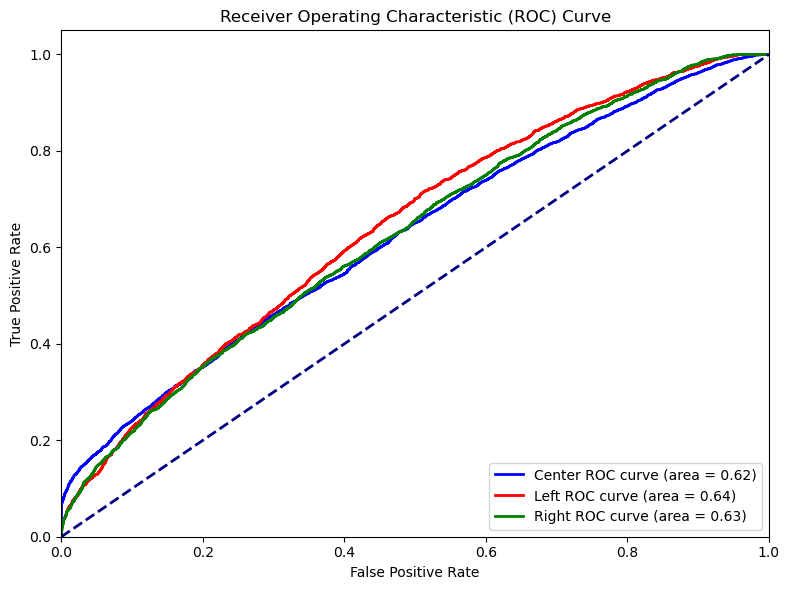


Log Loss: 1.01


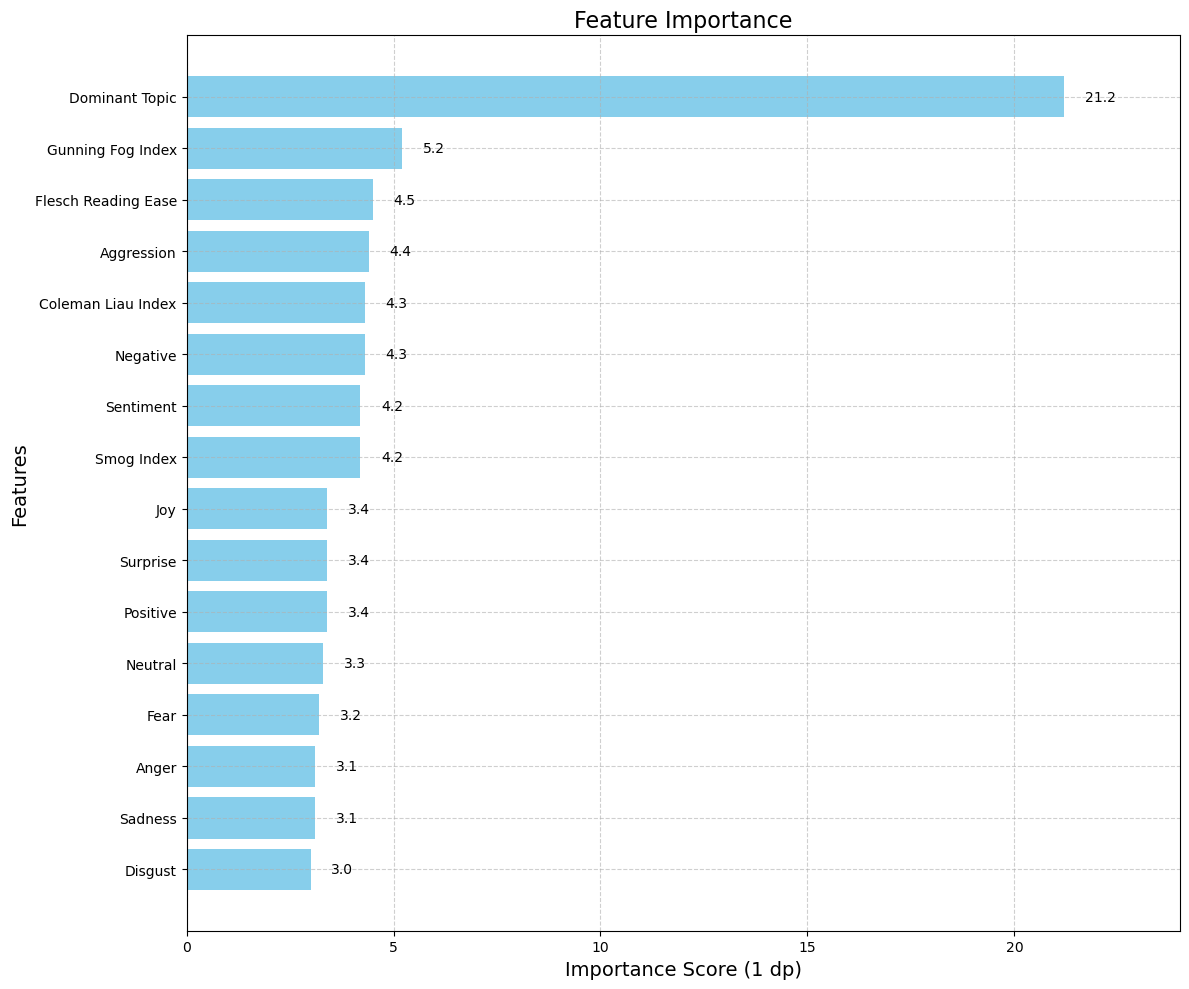


Per-Class Performance:

Class 'Center':
  Precision: 0.48
  Recall: 0.84
  F1-Score: 0.61

Class 'Left':
  Precision: 0.46
  Recall: 0.14
  F1-Score: 0.22

Class 'Right':
  Precision: 0.49
  Recall: 0.22
  F1-Score: 0.30

Class 'macro avg':
  Precision: 0.48
  Recall: 0.40
  F1-Score: 0.38

Class 'weighted avg':
  Precision: 0.48
  Recall: 0.48
  F1-Score: 0.42


C:\Users\20211424\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\20211424\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\20211424\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


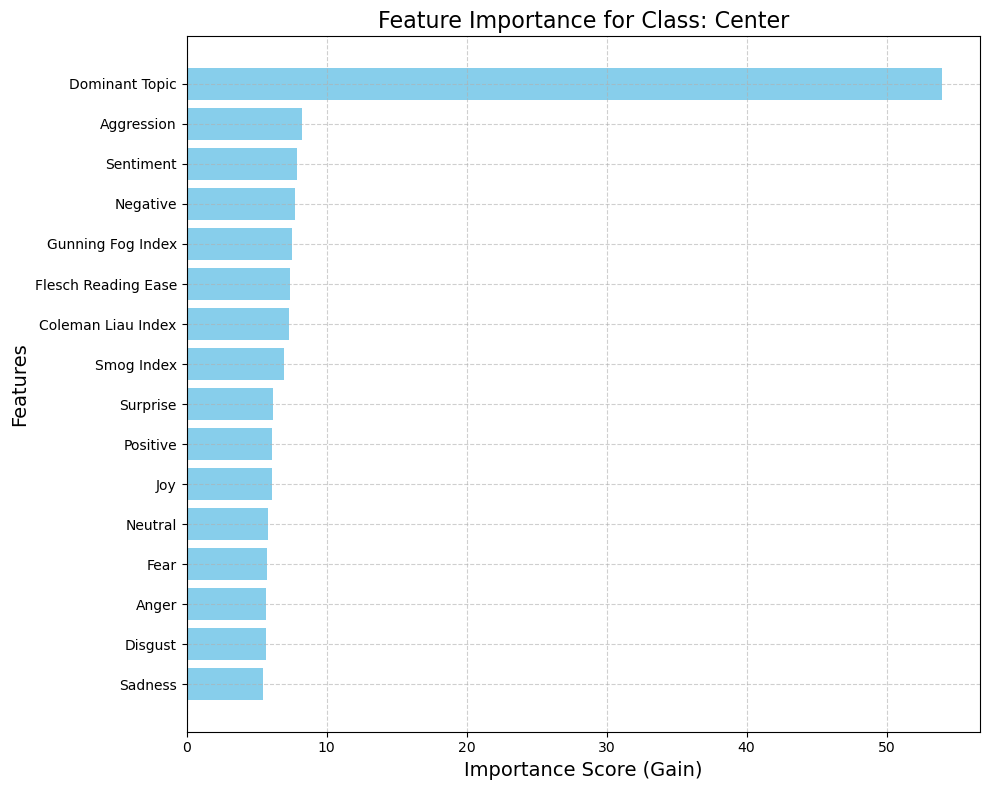

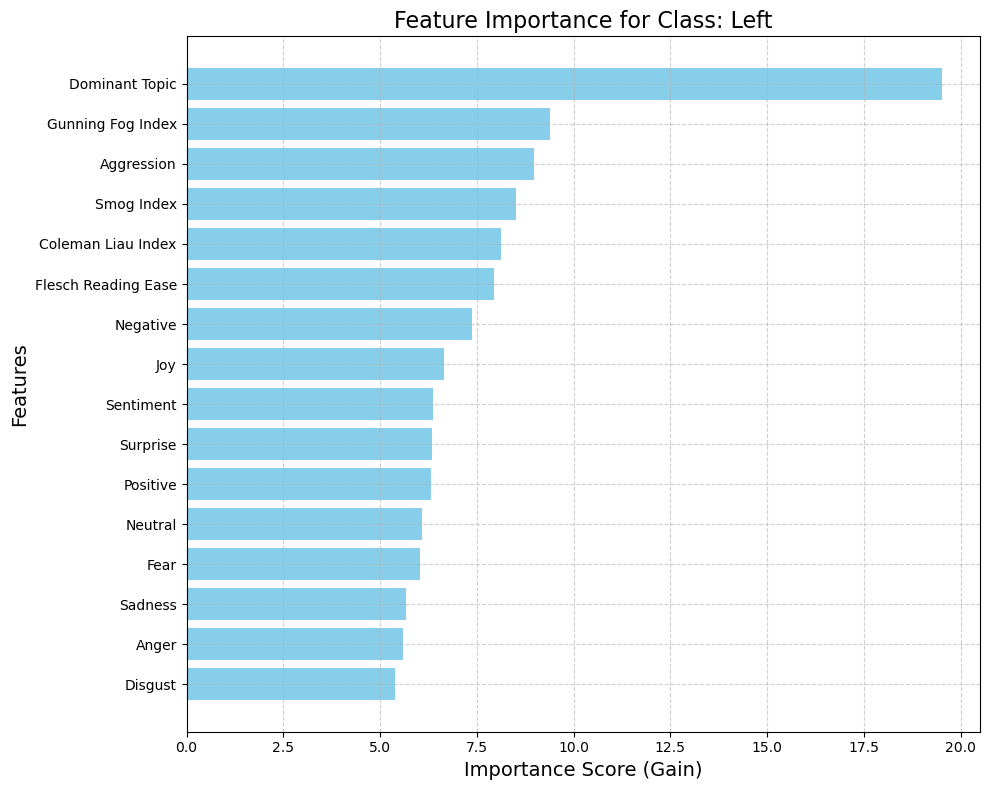

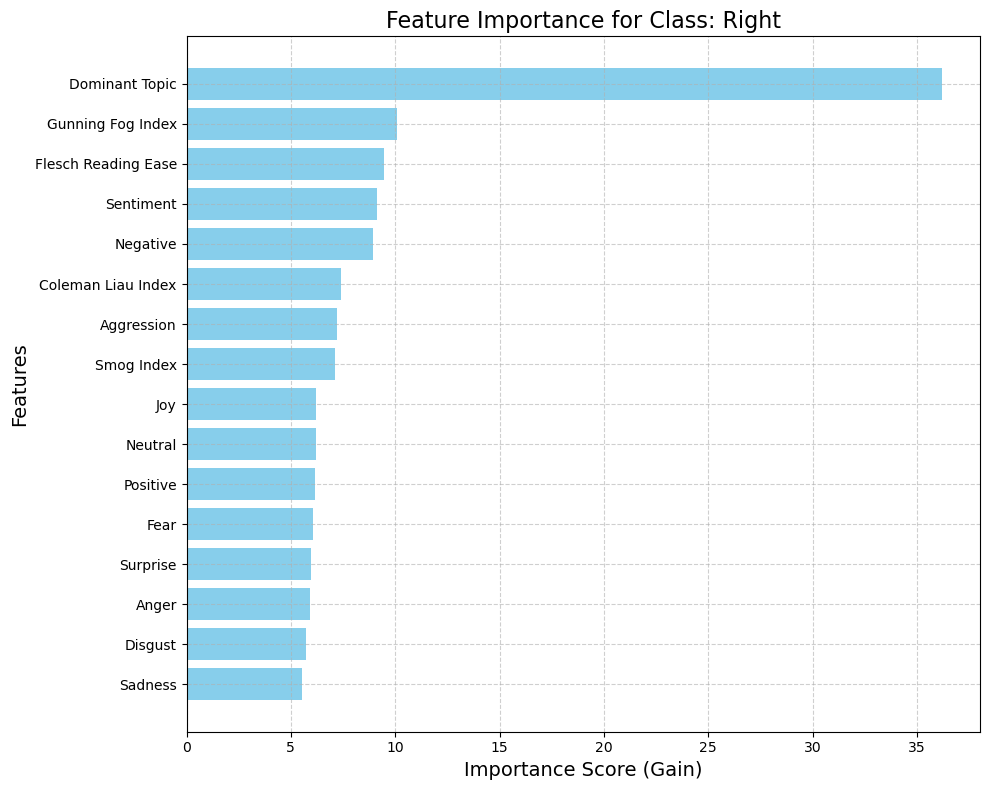

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from collections import defaultdict

target_column = 'political_leaning'

X = filtered_df.drop(columns=[target_column, "auhtor_ID", "post", "topic_probabilities", "Unnamed: 0"])
y = filtered_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with specified parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)  # For probability metrics

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Class label mapping
class_mapping = {0: 'Center', 1: 'Left', 2: 'Right'}

# Additional Metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_labels = [class_mapping[i] for i in range(len(cm))]  # Map class labels to new ones
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='macro')
print(f"\nPrecision (macro avg): {precision:.2f}")

recall = recall_score(y_test, y_pred, average='macro')
print(f"\nRecall (macro avg): {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1 Score (macro avg): {f1:.2f}")

# Binarize the true labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update with all your classes
n_classes = y_test_binarized.shape[1]

# Compute ROC and AUC for each class
roc_auc = {}
fpr = {}
tpr = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    print(f"\nClass {class_mapping[i]} AUC: {roc_auc[i]:.2f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust this based on your number of classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_mapping[i]} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()

# Log Loss
logloss = log_loss(y_test_binarized, y_pred_prob)
print(f"\nLog Loss: {logloss:.2f}")

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 10))  # Larger plot
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance = {k: round(v, 1) for k, v in importance.items()}  # Round values to 1 dp

# Process feature names
formatted_importance = {
    k.replace('_', ' ').title(): v for k, v in importance.items()
}
sorted_importance = sorted(formatted_importance.items(), key=lambda x: x[1], reverse=True)
keys, values = zip(*sorted_importance)

# Create a horizontal bar plot
bars = ax.barh(keys, values, color='skyblue')
# Add bar values next to each bar
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width() + 0.5,  # Slightly offset from the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically
        f"{value}",
        va='center',
        fontsize=10
    )

ax.set_xlim(0, 24)

# Formatting
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("Importance Score (1 dp)", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Save the plot in high DPI
plt.tight_layout()
plt.savefig("feature_importance_xgb.png", dpi=300)
plt.show()

report = classification_report(y_test, y_pred, target_names=[class_mapping[i] for i in range(len(cm))], output_dict=True)

print("\nPer-Class Performance:")
for class_label, metrics in report.items():
    if isinstance(metrics, dict):  # Skip overall statistics like 'accuracy'
        print(f"\nClass '{class_label}':")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")



# Train one-vs-rest classifiers
classifiers = OneVsRestClassifier(xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
))

classifiers.fit(X_train, y_train)

# Extract feature importance for each class
feature_importance_per_class = defaultdict(dict)

for class_idx, model in enumerate(classifiers.estimators_):
    booster = model.get_booster()
    importance = booster.get_score(importance_type='gain')
    formatted_importance = {k.replace('_', ' ').title(): v for k, v in importance.items()}
    feature_importance_per_class[class_mapping[class_idx]] = formatted_importance

# Plot feature importance for each class
for class_name, importance in feature_importance_per_class.items():
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    keys, values = zip(*sorted_importance)

    plt.figure(figsize=(10, 8))
    plt.barh(keys, values, color='skyblue')
    plt.title(f"Feature Importance for Class: {class_name}", fontsize=16)
    plt.xlabel("Importance Score (Gain)", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"feature_importance_{class_name.lower()}.png", dpi=300)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

target_column = 'political_leaning'

# Create a copy of the original DataFrame
df_copy = filtered_df.copy()

# Define the columns for interaction terms
interaction_columns = ['coleman_liau_index', 'flesch_reading_ease', 'aggression', 'gunning_fog_index']

# Generate interaction terms by multiplying each pair of columns
for i in range(len(interaction_columns)):
    for j in range(i + 1, len(interaction_columns)):
        # Create a new column for the interaction term
        col_name = f"{interaction_columns[i]}_x_{interaction_columns[j]}"
        df_copy[col_name] = df_copy[interaction_columns[i]] * df_copy[interaction_columns[j]]

# Prepare the features and target
X = df_copy.drop(columns=[target_column, "auhtor_ID", "post", "topic_probabilities"])
y = df_copy[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with specified parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)  # For probability metrics

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Class label mapping
class_mapping = {0: 'Center', 1: 'Left', 2: 'Right'}

# Additional Metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_labels = [class_mapping[i] for i in range(len(cm))]  # Map class labels to new ones
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='macro')
print(f"\nPrecision (macro avg): {precision:.2f}")

recall = recall_score(y_test, y_pred, average='macro')
print(f"\nRecall (macro avg): {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1 Score (macro avg): {f1:.2f}")

# Binarize the true labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update with all your classes
n_classes = y_test_binarized.shape[1]

# Compute ROC and AUC for each class
roc_auc = {}
fpr = {}
tpr = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    print(f"\nClass {class_mapping[i]} AUC: {roc_auc[i]:.2f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust this based on your number of classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_mapping[i]} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()

# Log Loss
logloss = log_loss(y_test_binarized, y_pred_prob)
print(f"\nLog Loss: {logloss:.2f}")

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 10))  # Larger plot
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance = {k: round(v, 1) for k, v in importance.items()}  # Round values to 1 dp

# Process feature names
formatted_importance = {
    k.replace('_', ' ').title(): v for k, v in importance.items()
}
sorted_importance = sorted(formatted_importance.items(), key=lambda x: x[1], reverse=True)
keys, values = zip(*sorted_importance)

# Create a horizontal bar plot
bars = ax.barh(keys, values, color='skyblue')
# Add bar values next to each bar
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width() + 0.5,  # Slightly offset from the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically
        f"{value}",
        va='center',
        fontsize=10
    )

ax.set_xlim(0, 24)

# Formatting
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("Importance Score (1 dp)", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Save the plot in high DPI
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print("\nClassification Report for Neural Network (MLP):")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_pred))


In [ ]:
#filtered_df = pd.read_csv("FINAL_DF.csv")
no_pollution = pd.read_csv("datasets/FINAL_DF_clean.csv")
display(no_pollution)
#extracted_df = df[['auhtor_ID', 'post']]

In [ ]:
filtered_df_v2 = filtered_df[['auhtor_ID', 'post']]
no_pollution_v2 = no_pollution[['auhtor_ID', 'post']]

In [ ]:
# Find all common rows between filtered_df_v2 and no_pollution_v2
common_rows_df = pd.merge(filtered_df, no_pollution_v2, how='inner')
display(common_rows_df)

In [ ]:
output_file = os.path.join("datasets", "NonPolluted.csv")
common_rows_df.to_csv(output_file, index=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import label_binarize

#Running tests for NON-POLLUTED DATASET

target_column = 'political_leaning'

X = common_rows_df.drop(columns=[target_column, "auhtor_ID", "post", "topic_probabilities"])#, "negative", "sentiment"])
y = common_rows_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with specified parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)  # For probability metrics

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Class label mapping
class_mapping = {0: 'Center', 1: 'Left', 2: 'Right'}

# Additional Metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_labels = [class_mapping[i] for i in range(len(cm))]  # Map class labels to new ones
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("confusion_matrix_NONPOLLUTED.png", dpi=300)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='macro')
print(f"\nPrecision (macro avg): {precision:.2f}")

recall = recall_score(y_test, y_pred, average='macro')
print(f"\nRecall (macro avg): {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='macro')
print(f"\nF1 Score (macro avg): {f1:.2f}")

# Binarize the true labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update with all your classes
n_classes = y_test_binarized.shape[1]

# Compute ROC and AUC for each class
roc_auc = {}
fpr = {}
tpr = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    print(f"\nClass {class_mapping[i]} AUC: {roc_auc[i]:.2f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']  # Adjust this based on your number of classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_mapping[i]} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("roc_curve_NONPOLLUTED.png", dpi=300)
plt.show()

# Log Loss
logloss = log_loss(y_test_binarized, y_pred_prob)
print(f"\nLog Loss: {logloss:.2f}")

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 10))  # Larger plot
importance = xgb_model.get_booster().get_score(importance_type='gain')
importance = {k: round(v, 1) for k, v in importance.items()}  # Round values to 1 dp

# Process feature names
formatted_importance = {
    k.replace('_', ' ').title(): v for k, v in importance.items()
}
sorted_importance = sorted(formatted_importance.items(), key=lambda x: x[1], reverse=True)
keys, values = zip(*sorted_importance)

# Create a horizontal bar plot
bars = ax.barh(keys, values, color='skyblue')
# Add bar values next to each bar
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width() + 0.5,  # Slightly offset from the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically
        f"{value}",
        va='center',
        fontsize=10
    )

ax.set_xlim(0, 24)

# Formatting
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("Importance Score (1 dp)", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Save the plot in high DPI
plt.tight_layout()
plt.savefig("feature_importance_NONPOLLUTED.png", dpi=300)
plt.show()


In [ ]:
#collecting the data for the Kaggle Baseline

filtered_df = pd.read_csv("datasets/FINAL_DF.csv")


In [ ]:
#Extra Dataset Kaggle below
KaggleAggression = pd.read_csv("datasets/KaggleAggresion.csv")
KaggleB1 = pd.read_csv("datasets/KAGGLE_BASELINE.csv")
KaggleB1 = KaggleB1[["political_leaning", "tweet", "flesch_reading_ease", "gunning_fog_index", "smog_index", "coleman_liau_index", "dominant_topic"]]
KaggleB2 = pd.read_csv("datasets/KAGGLE_BASELINE1.csv")
KaggleB3 = pd.read_csv("datasets/KAGGLE_BASELINE2.csv")

ALTERNATIVE = KaggleAggression.merge(KaggleB1, on=["political_leaning", "tweet"])
ALTERNATIVE = ALTERNATIVE.merge(KaggleB2, on=["political_leaning", "tweet"])
ALTERNATIVE = ALTERNATIVE.merge(KaggleB3, on=["political_leaning", "tweet"])
ALTERNATIVE.rename(columns={'tweet': 'post'}, inplace=True)

display(ALTERNATIVE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from collections import defaultdict

#RUNNING ON ALTERNATIVE DATASET

target_column = 'political_leaning'

X = filtered_df.drop(columns=[target_column, "auhtor_ID", "post", "topic_probabilities"])#, "negative", "sentiment"])
y = filtered_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with specified parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
)

# Train the model
xgb_model.fit(X_train, y_train)

y_test = ALTERNATIVE[target_column]

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)  # For probability metrics

# Evaluate the model with the alternative y_test
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Class label mapping
class_mapping = {0: 'Center', 1: 'Left', 2: 'Right'}

# Additional Metrics
# print("\nConfusion Matrix:")
# cm = confusion_matrix(y_test, y_pred)
# cm_labels = [class_mapping[i] for i in range(len(cm))]  # Map class labels to new ones
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.savefig("confusion_matrix.png", dpi=300)
# plt.show()

# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nAccuracy: {accuracy:.2f}")

# precision = precision_score(y_test, y_pred, average='macro')
# print(f"\nPrecision (macro avg): {precision:.2f}")

# recall = recall_score(y_test, y_pred, average='macro')
# print(f"\nRecall (macro avg): {recall:.2f}")

# f1 = f1_score(y_test, y_pred, average='macro')
# print(f"\nF1 Score (macro avg): {f1:.2f}")

# # Binarize the true labels for multiclass ROC
# y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Update with all your classes
# n_classes = y_test_binarized.shape[1]

# # Compute ROC and AUC for each class
# roc_auc = {}
# fpr = {}
# tpr = {}
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
#     roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
#     print(f"\nClass {class_mapping[i]} AUC: {roc_auc[i]:.2f}")

# # Plot ROC Curve for each class
# plt.figure(figsize=(8, 6))
# colors = ['blue', 'red', 'green']  # Adjust this based on your number of classes
# for i in range(n_classes):
#     plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_mapping[i]} ROC curve (area = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.tight_layout()
# plt.savefig("roc_curve.png", dpi=300)
# plt.show()

# # Log Loss
# logloss = log_loss(y_test_binarized, y_pred_prob)
# print(f"\nLog Loss: {logloss:.2f}")

# # Plot feature importance
# fig, ax = plt.subplots(figsize=(12, 10))  # Larger plot
# importance = xgb_model.get_booster().get_score(importance_type='gain')
# importance = {k: round(v, 1) for k, v in importance.items()}  # Round values to 1 dp

# # Process feature names
# formatted_importance = {
#     k.replace('_', ' ').title(): v for k, v in importance.items()
# }
# sorted_importance = sorted(formatted_importance.items(), key=lambda x: x[1], reverse=True)
# keys, values = zip(*sorted_importance)

# # Create a horizontal bar plot
# bars = ax.barh(keys, values, color='skyblue')
# # Add bar values next to each bar
# for bar, value in zip(bars, values):
#     ax.text(
#         bar.get_width() + 0.5,  # Slightly offset from the bar
#         bar.get_y() + bar.get_height() / 2,  # Centered vertically
#         f"{value}",
#         va='center',
#         fontsize=10
#     )

# ax.set_xlim(0, 24)

# # Formatting
# ax.set_title("Feature Importance", fontsize=16)
# ax.set_xlabel("Importance Score (1 dp)", fontsize=14)
# ax.set_ylabel("Features", fontsize=14)
# ax.grid(True, linestyle='--', alpha=0.6)
# plt.gca().invert_yaxis()  # Invert y-axis for better readability

# # Save the plot in high DPI
# plt.tight_layout()
# plt.savefig("feature_importance.png", dpi=300)
# plt.show()

report = classification_report(y_test, y_pred, target_names=[class_mapping[i] for i in range(len(cm))], output_dict=True)

print("\nPer-Class Performance:")
for class_label, metrics in report.items():
    if isinstance(metrics, dict):  # Skip overall statistics like 'accuracy'
        print(f"\nClass '{class_label}':")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")



# Train one-vs-rest classifiers
classifiers = OneVsRestClassifier(xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    class_weight='balanced',
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.4
))

classifiers.fit(X_train, y_train)

# Extract feature importance for each class
feature_importance_per_class = defaultdict(dict)

for class_idx, model in enumerate(classifiers.estimators_):
    booster = model.get_booster()
    importance = booster.get_score(importance_type='gain')
    formatted_importance = {k.replace('_', ' ').title(): v for k, v in importance.items()}
    feature_importance_per_class[class_mapping[class_idx]] = formatted_importance

# Plot feature importance for each class
for class_name, importance in feature_importance_per_class.items():
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    keys, values = zip(*sorted_importance)

    plt.figure(figsize=(10, 8))
    plt.barh(keys, values, color='skyblue')
    plt.title(f"Feature Importance for Class: {class_name}", fontsize=16)
    plt.xlabel("Importance Score (Gain)", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"feature_importance_{class_name.lower()}.png", dpi=300)
    plt.show()

In [ ]:
print(y_test)